In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = "gym_members_exercise_tracking.csv"

df = pd.read_csv(data)

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
col_names = df.columns

col_names

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [9]:
ordinal_categories = [['Male', 'Female']]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
df['Gender_encoded'] = ordinal_encoder.fit_transform(df[['Gender']])

print("\nOrdinal Encoding:")
df.head()



Ordinal Encoding:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_encoded
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.0
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,1.0
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1.0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.0
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0.0


In [10]:
df = df.drop(columns=['Gender'])


In [11]:
df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_encoded
0,56,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.0
1,46,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,1.0
2,32,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1.0
3,25,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.0
4,38,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0.0


In [12]:
label_encoder = LabelEncoder()
df['Workout_Type_encoded']= label_encoder.fit_transform(df['Workout_Type'])
df.head(70)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_encoded,Workout_Type_encoded
0,56,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.0,3
1,46,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,1.0,1
2,32,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1.0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.0,2
4,38,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,48,67.1,1.61,160,151,74,0.62,421.0,Cardio,33.4,1.5,2,1,25.89,1.0,0
66,32,85.9,1.60,176,145,60,1.99,1587.0,HIIT,14.5,3.5,5,3,33.55,0.0,1
67,25,65.4,1.77,160,141,58,0.89,627.0,Cardio,27.6,2.6,3,1,20.88,1.0,0
68,31,61.1,1.76,189,150,67,1.81,1358.0,Yoga,18.6,2.7,4,3,19.72,1.0,3


In [13]:
#	  0	Cardio
#	  1	HIIT
# 	  2	Strength
#     3	Yoga

#  Male = 0
#  Female = 1

In [14]:
df.drop(columns=['Workout_Type'], inplace=True)

In [15]:
def jumlah_outlier(df, kolom):
    quartile_1 = df[kolom].quantile(0.25)
    quartile_3 = df[kolom].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    return outliers.shape[0]


def persen_outlier(df, kolom):
    quartile_1 = df[kolom].quantile(0.25)
    quartile_3 = df[kolom].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    persentase_outlier = (outliers.shape[0] / df.shape[0]) * 100
    return persentase_outlier

In [16]:
def handling_Outlier_IQR9(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])

for col in df.columns:
    handling_Outlier_IQR9(df, col)

In [17]:
print("Jumlah outlier tabel user")
for feature in df.columns:
  persentase_outlier = persen_outlier(df, feature) 
  jumlah_outliers = jumlah_outlier(df, feature) 
  formatted_persentase_outlier = "{:.2f}".format(persentase_outlier)
  print(feature, ' : ', jumlah_outliers, ' : ', formatted_persentase_outlier, '%')

Jumlah outlier tabel user
Age  :  0  :  0.00 %
Weight (kg)  :  0  :  0.00 %
Height (m)  :  0  :  0.00 %
Max_BPM  :  0  :  0.00 %
Avg_BPM  :  0  :  0.00 %
Resting_BPM  :  0  :  0.00 %
Session_Duration (hours)  :  0  :  0.00 %
Calories_Burned  :  0  :  0.00 %
Fat_Percentage  :  0  :  0.00 %
Water_Intake (liters)  :  0  :  0.00 %
Workout_Frequency (days/week)  :  0  :  0.00 %
Experience_Level  :  0  :  0.00 %
BMI  :  0  :  0.00 %
Gender_encoded  :  0  :  0.00 %
Workout_Type_encoded  :  0  :  0.00 %


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
X = df.drop(columns=['Gender_encoded'], axis=1)
y = df['Gender_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[[147  10]
 [  2 133]]
Accuracy: 0.958904109589041
Precision: 0.9300699300699301
Recall: 0.9851851851851852
F1 Score: 0.9568345323741008


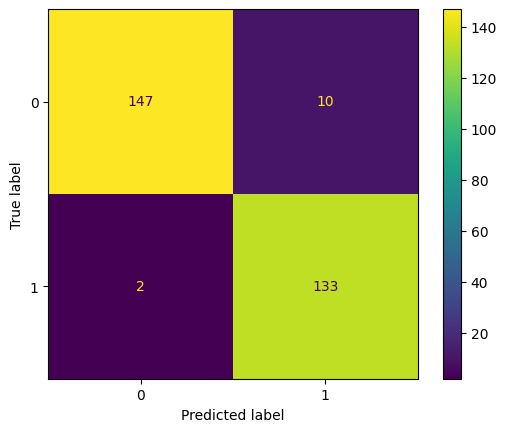

In [21]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
gender_encoded = [0, 1]
print(cm)
dispplaysvm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gender_encoded)
dispplaysvm.plot()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))


In [22]:
new_data = pd.DataFrame({
    'Age': [30],
    'Weight (kg)': [70],
    'Height (m)': [1.75],
    'Max_BPM': [180],
    'Avg_BPM': [150],
    'Resting_BPM': [60],
    'Session_Duration (hours)': [1.5],
    'Calories_Burned': [500],
    'Fat_Percentage': [20],
    'Water_Intake (liters)': [2.5],
    'Workout_Frequency (days/week)': [5],
    'Experience_Level': [4],
    'BMI': [22.86],
    'Workout_Type_encoded': [1]
})



new_prediction = clf.predict(new_data)
print(f"Jenis Kelamin Terprediksi: {new_prediction}")
predicted_gender = ordinal_encoder.inverse_transform(new_prediction.reshape(-1, 1))

print(f"Jenis Kelamin Terprediksi: {predicted_gender[0][0]}")

Jenis Kelamin Terprediksi: [1.]
Jenis Kelamin Terprediksi: Female


In [23]:
X1 = df.drop(columns=['Gender_encoded'], axis=1)
y1 = df['Gender_encoded']

In [24]:
from sklearn.naive_bayes import GaussianNB

X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X1, y1, random_state=0, test_size=0.2)

model = GaussianNB()
model.fit(X_train_naive, y_train_naive)


GaussianNB()

In [25]:
X1

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_encoded
0,56.0,88.3,1.71,180.0,157.0,60.0,1.69,1313.0,12.6,3.5,4.0,3.0,30.20,3.0
1,46.0,74.9,1.53,179.0,151.0,66.0,1.30,883.0,33.9,2.1,4.0,2.0,32.00,1.0
2,32.0,68.1,1.66,167.0,122.0,54.0,1.11,677.0,33.4,2.3,4.0,2.0,24.71,0.0
3,25.0,53.2,1.70,190.0,164.0,56.0,0.59,532.0,28.8,2.1,3.0,1.0,18.41,2.0
4,38.0,46.1,1.79,188.0,158.0,68.0,0.64,556.0,29.2,2.8,3.0,1.0,14.39,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24.0,87.1,1.74,187.0,158.0,67.0,1.57,1364.0,10.0,3.5,4.0,3.0,28.77,2.0
969,25.0,66.6,1.61,184.0,166.0,56.0,1.38,1260.0,25.0,3.0,2.0,1.0,25.69,2.0
970,59.0,60.4,1.76,194.0,120.0,53.0,1.72,929.0,18.8,2.7,5.0,3.0,19.50,0.0
971,32.0,126.4,1.83,198.0,146.0,62.0,1.10,883.0,28.2,2.1,3.0,2.0,37.74,1.0


In [26]:
y_pred_Naive = model.predict(X_test_naive)

accuracy_nb = accuracy_score(y_test_naive, y_pred_Naive)
f1_nb = f1_score(y_test_naive, y_pred_Naive, average="weighted")
precision_nb = metrics.precision_score(y_test_naive, y_pred_Naive)
recall_nb = metrics.recall_score(y_test_naive, y_pred_Naive)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes F1 Score:", f1_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)

Naive Bayes Accuracy: 0.8769230769230769
Naive Bayes F1 Score: 0.8768648141254916
Naive Bayes Precision: 0.8037383177570093
Naive Bayes Recall: 0.9662921348314607


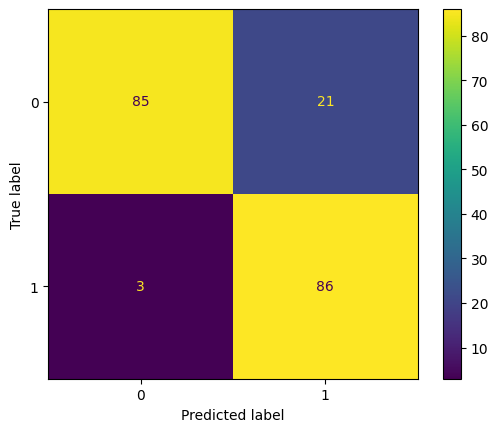

In [27]:
labels = [0, 1]
cm2 = confusion_matrix(y_test_naive, y_pred_Naive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
disp.plot();


In [28]:
new_data1 = pd.DataFrame({
    'Age': [30],
    'Weight (kg)': [70],
    'Height (m)': [1.75],
    'Max_BPM': [180],
    'Avg_BPM': [150],
    'Resting_BPM': [60],
    'Session_Duration (hours)': [1.5],
    'Calories_Burned': [500],
    'Fat_Percentage': [20],
    'Water_Intake (liters)': [2.5],
    'Workout_Frequency (days/week)': [5],
    'Experience_Level': [4],
    'BMI': [22.86],
    'Workout_Type_encoded': [1]
})

new_prediction_naive = model.predict(new_data1)
print(f"Jenis Kelamin Terprediksi (Naive Bayes): {new_prediction_naive}")
prediction_gender = ordinal_encoder.inverse_transform(new_prediction_naive.reshape(-1,1))
print(prediction_gender)




Jenis Kelamin Terprediksi (Naive Bayes): [1.]
[['Female']]


In [ ]:
results = {
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [accuracy_nb, metrics.accuracy_score(y_test, y_pred)],
    'F1 Score': [f1_nb, metrics.f1_score(y_test, y_pred)],
    'Precision': [precision_nb, metrics.precision_score(y_test, y_pred)],
    'Recall': [recall_nb, metrics.recall_score(y_test, y_pred)]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)

         Model  Accuracy  F1 Score  Precision    Recall
0  Naive Bayes  0.876923  0.876865   0.803738  0.966292
1          SVM  0.958904  0.956835   0.930070  0.985185


## Perbandingan Model

Dalam notebook ini, kami telah membandingkan kinerja dua model machine learning yang berbeda: Naive Bayes dan Support Vector Machine (SVM). Perbandingan ini didasarkan pada beberapa metrik evaluasi termasuk Akurasi, F1 Score, Presisi, dan Recall. Berikut adalah ringkasan hasilnya:

| Model        | Akurasi  | F1 Score | Presisi  | Recall   |
|--------------|----------|----------|----------|----------|
| Naive Bayes  | 0.876923 | 0.876865 | 0.803738 | 0.966292 |
| SVM          | 0.958904 | 0.956835 | 0.930070 | 0.985185 |

### Penjelasan Metrik

- **Akurasi**: Rasio prediksi yang benar terhadap total instance.
- **F1 Score**: Rata-rata harmonis dari Presisi dan Recall, memberikan keseimbangan antara keduanya.
- **Presisi**: Rasio prediksi positif yang benar terhadap total prediksi positif.
- **Recall**: Rasio prediksi positif yang benar terhadap semua observasi dalam kelas aktual.

### Observasi

- Model SVM mengungguli model Naive Bayes di semua metrik.
- Model SVM memiliki akurasi yang lebih tinggi (0.958904) dibandingkan dengan model Naive Bayes (0.876923).
- F1 Score, Presisi, dan Recall juga lebih tinggi untuk model SVM, menunjukkan kinerja keseluruhan yang lebih baik.

Hasil ini menunjukkan bahwa model SVM lebih efektif untuk dataset dan masalah ini.
